## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/belikoooova/data-analysis/main/human-activity/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/belikoooova/data-analysis/main/human-activity/test.csv')

In [4]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [7]:
print(f'Пропуски в train:\n {train.isnull().sum()}\n')
print(f'Пропуски в test:\n {test.isnull().sum()}\n')
print(f'Дубли в train:\n {train.duplicated().sum()}\n')
print(f'Дубли в test:\n {test.duplicated().sum()}')

Пропуски в train:
 tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Пропуски в test:
 tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Дубли в train:
 0

Дубли в test:
 0


### Вывод
Как мы видим, пропусков и дублей в данных train и test нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [8]:
train.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.543884,-0.727735,0.678505,-0.468604,-0.847963,-0.489547,0.058593,-0.056515,-0.128562,17.413085
std,0.477653,0.315832,0.508656,0.544547,0.233633,0.511807,0.297480,0.279122,0.403686,8.975143
min,-1.000000,-0.999889,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.931208,1.000000
25%,-0.983282,-0.991595,0.804270,-0.936219,-0.999480,-0.812065,-0.017885,-0.143414,-0.486841,8.000000
50%,-0.883371,-0.950268,0.926693,-0.881637,-0.986582,-0.709417,0.182071,0.003181,-0.163271,19.000000
75%,-0.106892,-0.474625,0.965095,-0.017129,-0.764508,-0.509079,0.248353,0.107659,0.155112,26.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.478157,1.000000,1.000000,30.000000


### Выводы
- все данные (кроме, конечно, номера испытуемого) уже нормировваны от -1 до 1, это удобно;
- 75% выборки имеют отрицательное усредненное ускорение, 50% - не более -0.88;
- довольно большие стандартные отклонения, особенно для минимума гравитационной составляющей ускорения по оси Х и максимальной величина ускорения тела по оси Х, а также углов: это говорит о разнообразности движений налюдаемых;
- среднее значение 17 и стандартное отклонение 9 может говорить о равномерном распределении наблюдений среди участников.

In [9]:
test.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.559043,-0.735661,0.696878,-0.462063,-0.880361,-0.513923,0.074886,-0.048720,-0.154042,12.986427
std,0.439539,0.282074,0.502873,0.523916,0.160496,0.509205,0.324300,0.241467,0.392203,6.950984
min,-0.998936,-1.000000,-0.756774,-0.952357,-0.999989,-0.984195,-0.913704,-0.949228,-1.000000,2.000000
25%,-0.978433,-0.989078,0.836787,-0.934447,-0.999330,-0.829722,0.022140,-0.098485,-0.497070,9.000000
50%,-0.861830,-0.914698,0.934930,-0.852659,-0.979336,-0.729648,0.181563,-0.010671,-0.202050,12.000000
75%,-0.149596,-0.486423,0.970871,-0.009965,-0.799113,-0.545939,0.260252,0.092373,0.140254,18.000000
max,0.479547,0.117606,0.996148,0.786436,0.048730,0.833180,1.000000,0.973113,0.960367,24.000000


### Выводы
- тенденция с отрицательным усредненным ускорением тела повторяется;
- средние значения по всем параметрам в выборках отличаются не более чем на 0.05, это может говорить о грамотно проведенном разделении на тестовую и обучающую выборку. Тем не менее, не спешу делать выводы: возможно, 0.05 для этого датасета является значительной разницей;
- судя по максимумам и минимумам, диапазон по некоторым столбцам расширился или сузился (в основном - второе, что логично, так как во второй выборке меньшее количество испытуемых).

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [10]:
def get_info_about_activity(df):
  print(df['Activity'].value_counts())
  print()

def get_dif_between_min_and_max_in_activity_value_counts(df):
  max = df['Activity'].value_counts().max()
  min = df['Activity'].value_counts().min()
  return (((max - min) / max) * 100)

In [11]:
print('Количество значений в train:')
get_info_about_activity(train)
print(f'Разница в train: {get_dif_between_min_and_max_in_activity_value_counts(train)}%\n')
print('Количество значений в test:')
get_info_about_activity(test)
print(f'Разница в test: {get_dif_between_min_and_max_in_activity_value_counts(test)}%')


Количество значений в train:
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Разница в train: 29.92181947405828%

Количество значений в test:
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

Разница в test: 21.787709497206702%


### Вывод
Обе разницы не превышают 30% -> по нашим критериям сбалансировано.

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [12]:
pd.get_dummies(train, columns=['Activity']).corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.073652,-0.396643,-0.396389,-0.414460,0.358825,0.561344,0.405434
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.110321,-0.386730,-0.379403,-0.370699,0.531695,0.445048,0.257524
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.042371,-0.973167,0.187055,0.262354,0.234820,0.192409,0.159741
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.055633,-0.394745,-0.387297,-0.399861,0.298526,0.658369,0.347429
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.037000,-0.287395,-0.276766,-0.296141,0.189834,0.217399,0.534750
"angle(X,gravityMean)",-0.370849,-0.382246,-0.988663,-0.384192,-0.213318,1.000000,-0.783848,-0.643655,0.265523,0.026137,0.956927,-0.181082,-0.266279,-0.233903,-0.222029,-0.116118
"angle(Y,gravityMean)",0.495561,0.478567,0.797116,0.480229,0.363170,-0.783848,1.000000,0.594885,-0.046213,-0.009829,-0.816776,-0.096667,0.241314,0.243434,0.186124,0.310982
"angle(Z,gravityMean)",0.426283,0.380967,0.667415,0.405023,0.423927,-0.643655,0.594885,1.000000,-0.183815,-0.098712,-0.678385,-0.065389,0.167701,0.198901,0.162849,0.273889
fBodyAcc-skewness()-X,0.379796,0.266002,-0.261676,0.335708,0.260316,0.265523,-0.046213,-0.183815,1.000000,0.019742,0.206542,-0.223813,-0.419856,0.024511,0.176759,0.277785
subject,-0.073652,-0.110321,-0.042371,-0.055633,-0.037000,0.026137,-0.009829,-0.098712,0.019742,1.000000,0.028078,0.029473,0.018212,-0.047385,-0.014201,-0.019371


### Выводы
- очень большие корреляции между многими признаками, почти для всех она превышает 0,4;
- корреляция между **tBodyAccMag-mean()** и **tBodyGyroJerk-mad()-X** - 0,9. Это может говорить о том, что рост ускорения часто вызван именно величиной рывка по горизонтальной оси. Логично, ведь чаще вего люди двигаются именно в горизонтальной плоскости :)
- тоже самое можно сказать и про **tBodyAcc-max()-X**;
- сильная отрицательная корреляция между такими переменными, как **angle(X,gravityMean)** и **tBodyGyroJerk-mad()-X**, может указывать на то, что при увеличении медианного значения рывка тела по оси X угол между осью X и вектором гравитации, возможно, уменьшается;
- углы **(angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean))** показывают сильную корреляцию друг с другом (причем как положительную, так и отрицательную), что может говорить о связанных изменениях в ориентации тела в пространстве. Опять же, логично, чаще всего наше движение распространяется по пространству не вдоль строго одной оси;
- корреляция переменной **subject** со всеми остальными мала, что указывает на то, что физические характеристики измерений не зависят от конкретного испытуемого. Это классно, так как поможет хорошо обобщить модель :)
- касательно целевой переменной: огромная корреляция у лежания и угла по оси х, также значительная корреляция у fBodyAcc-bandsEnergy()-1,8.2 и подъема вверх и др...

In [13]:
pd.get_dummies(test, columns=['Activity']).corr()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity_LAYING,Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
tBodyAccMag-mean(),1.000000,0.934773,0.407084,0.965114,0.767875,-0.400871,0.439051,0.425011,0.365670,-0.057359,-0.432375,-0.401367,-0.414812,0.382256,0.533885,0.399410
tBodyGyroJerk-mad()-X,0.934773,1.000000,0.393773,0.898628,0.625414,-0.387274,0.423288,0.368411,0.278765,-0.079811,-0.409460,-0.395664,-0.379256,0.522026,0.464393,0.255742
tGravityAcc-min()-X,0.407084,0.393773,1.000000,0.386764,0.301643,-0.989043,0.697006,0.633881,-0.237864,0.004927,-0.983505,0.196159,0.244371,0.227835,0.193024,0.163337
tBodyAcc-max()-X,0.965114,0.898628,0.386764,1.000000,0.707129,-0.384454,0.410477,0.398008,0.338543,-0.071786,-0.407889,-0.396788,-0.408003,0.281951,0.638335,0.364582
"fBodyAcc-bandsEnergy()-1,8.2",0.767875,0.625414,0.301643,0.707129,1.000000,-0.279783,0.327473,0.446245,0.293881,-0.090817,-0.342430,-0.295023,-0.323854,0.213190,0.270809,0.524637
"angle(X,gravityMean)",-0.400871,-0.387274,-0.989043,-0.384454,-0.279783,1.000000,-0.668108,-0.615114,0.235208,0.003138,0.966505,-0.203741,-0.240721,-0.229489,-0.218656,-0.115408
"angle(Y,gravityMean)",0.439051,0.423288,0.697006,0.410477,0.327473,-0.668108,1.000000,0.425454,-0.087006,-0.047553,-0.725073,-0.058690,0.200925,0.193011,0.160255,0.262663
"angle(Z,gravityMean)",0.425011,0.368411,0.633881,0.398008,0.446245,-0.615114,0.425454,1.000000,-0.208121,0.055885,-0.649058,-0.043474,0.109366,0.166195,0.164282,0.286753
fBodyAcc-skewness()-X,0.365670,0.278765,-0.237864,0.338543,0.293881,0.235208,-0.087006,-0.208121,1.000000,0.015103,0.224384,-0.274466,-0.411989,0.034471,0.237610,0.213281
subject,-0.057359,-0.079811,0.004927,-0.071786,-0.090817,0.003138,-0.047553,0.055885,0.015103,1.000000,0.019262,0.017383,0.021736,-0.042317,-0.006886,-0.011007


### Выводы
В целом, что справедливо для обучающей выборки - то, в нашем случае, справедливо и для тестовой.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

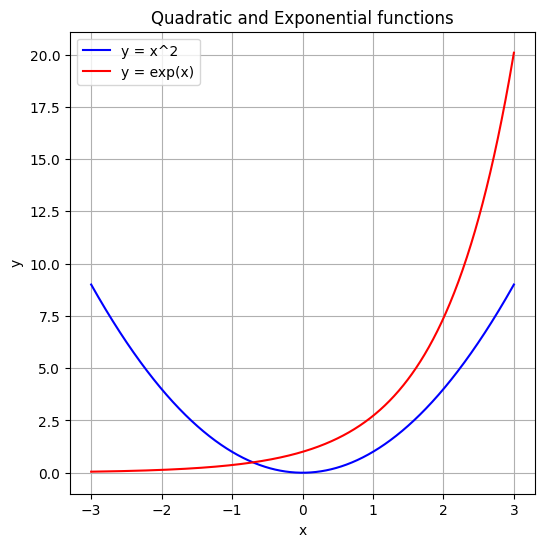

In [15]:
x = np.linspace(-3, 3, 1000)

y_quad = x**2
y_hyper = np.exp(x)


plt.figure(figsize=(6, 6))
plt.plot(x, y_quad, label='y = x^2', color='blue')
plt.plot(x, y_hyper, label='y = exp(x)', color='red')
plt.title('Quadratic and Exponential functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

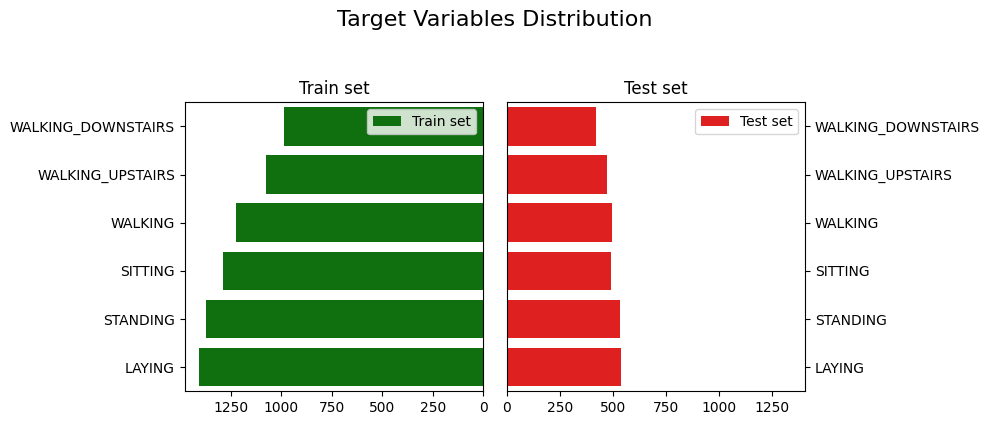

In [16]:
plt.figure(figsize=(10, 4))

# Обучающая
train_counts = train['Activity'].value_counts().sort_values()
plt.subplot(1, 2, 1)
train_barplot = sns.barplot(x=train_counts.values, y=train_counts.index, color='green', label='Train set')
plt.gca().invert_xaxis() # Отзеркаливаем
train_barplot.set(ylabel=None)
plt.title('Train set')

# Тестовая
test_counts = test['Activity'].value_counts()
plt.subplot(1, 2, 2)
test_barplot = sns.barplot(x=test_counts.values, y=test_counts.index, order = train_counts.index, color='red', label='Test set') # Порядок как у трейна
plt.title('Test set')
test_barplot.set(ylabel=None)
plt.gca().yaxis.tick_right() # Чтобы подписи были справа, как на сэмпле

# Одинаковые пределы
plt.xlim(0, max(test_counts.values.max(), train_counts.values.max()))

plt.suptitle('Target Variables Distribution', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

Text(0.5, 1.0, 'Train correlation heatmap')

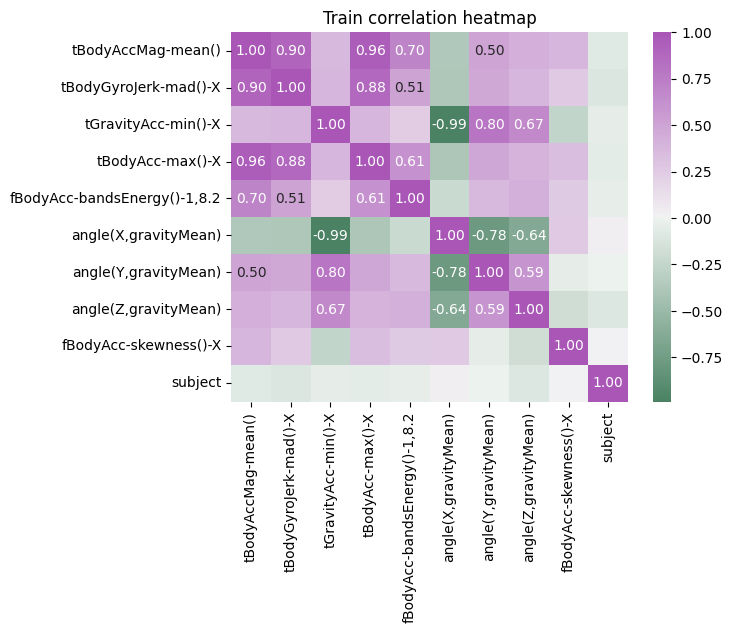

In [17]:
ax = sns.heatmap(train.corr(), cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), annot=True, fmt='0.2f')
for t in ax.texts:
    if float(t.get_text())>=0.5 or float(t.get_text())<=-0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

ax.set_title("Train correlation heatmap")

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

In [19]:
sns.pairplot(train)

Output hidden; open in https://colab.research.google.com to view.

### Вывод
Этот анализ был лучше чем кекс, пирожное, торт. Невероятно долгий.
"Проще" всего было наблюдать за гистограммами, и отслеживать, где в них смещен пик. Распределение **subject** близко к равномерному, у угла по игреку пик вмещен вправо (особенно на обучающей выиборке)

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

In [21]:
def show_tBodyAccMag_mean_kde_by_activities(df):
  plt.figure(figsize=(10, 6))

  # График для каждой активности
  for activity in df['Activity'].value_counts().index:
      activity_data = df[df['Activity'] == activity]
      sns.kdeplot(activity_data['tBodyAccMag-mean()'], label=activity)

  # Разделяющая линия
  threshold = -0.55
  plt.axvline(x=threshold, color='k', linestyle='--')

  # Легенда и подписи
  plt.legend(title='Activities')
  plt.title('Mean body acceleration for activities')
  plt.xlabel('Body acceleration')
  plt.ylabel('Density')

  plt.show()

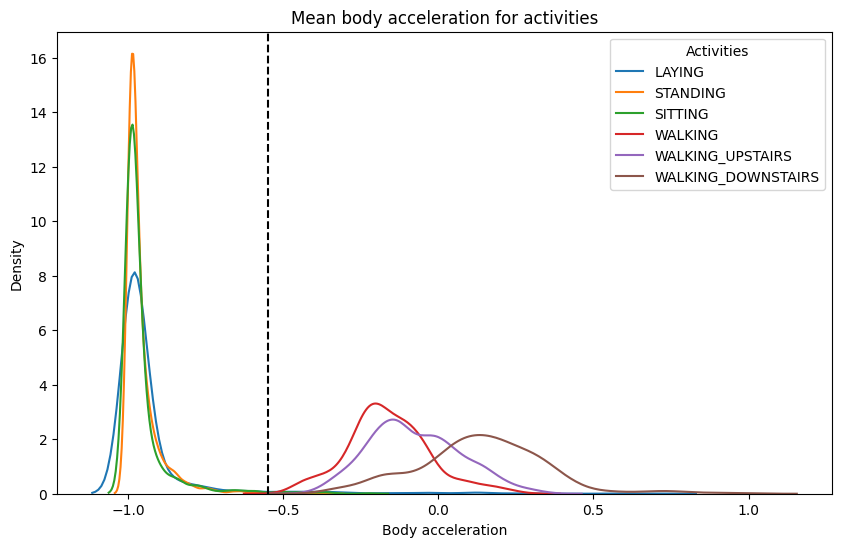

In [23]:
show_tBodyAccMag_mean_kde_by_activities(train)

Предположим, что WALKING, WALKING_UPSTAIRS и WALKING_DOWNSTAIRS - динамические активности, LAYING, STAYING, SITTING - статические.

In [24]:
def get_accuracy_of_type_of_activity_static(df, threshold):
  activities = ['SITTING', 'STANDING', 'LAYING']
  # Активность принадлежит статическим + значение tBodyAccMag-mean() не больше нашей линии / общее число статической активности
  return df[(df['Activity'].isin(activities)) & (df['tBodyAccMag-mean()'] <= threshold)].shape[0] / df[df['Activity'].isin(activities)].shape[0]

def get_accuracy_of_type_of_activity_dynamic(df, threshold):
  activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
  # Аналогично
  return df[(df['Activity'].isin(activities)) & (df['tBodyAccMag-mean()'] > threshold)].shape[0] / df[df['Activity'].isin(activities)].shape[0]

In [34]:
print(f'Доля правильных ответов для статических активностей в обучающей выборке: {get_accuracy_of_type_of_activity_static(train, -0.55)}')
print(f'Доля правильных ответов для динамических активностей в обучающей выборке: {get_accuracy_of_type_of_activity_dynamic(train, -0.55)}')

Доля правильных ответов для статических активностей в обучающей выборке: 0.9835259404966806
Доля правильных ответов для динамических активностей в обучающей выборке: 1.0


### Вывод
Итак, судя по доле правильных ответов, наше предсказание работает очень хороошо. Могу предположить, что это связано с тем, что для статических и для динамических активностей характерно свое значение ускорения: когда человек в покое, его ускорение скорее отрицаительное, ведь человек замедляется, и напротив - когда человек идет, его ускорение чаще положительное, ведь ходьба == движение.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

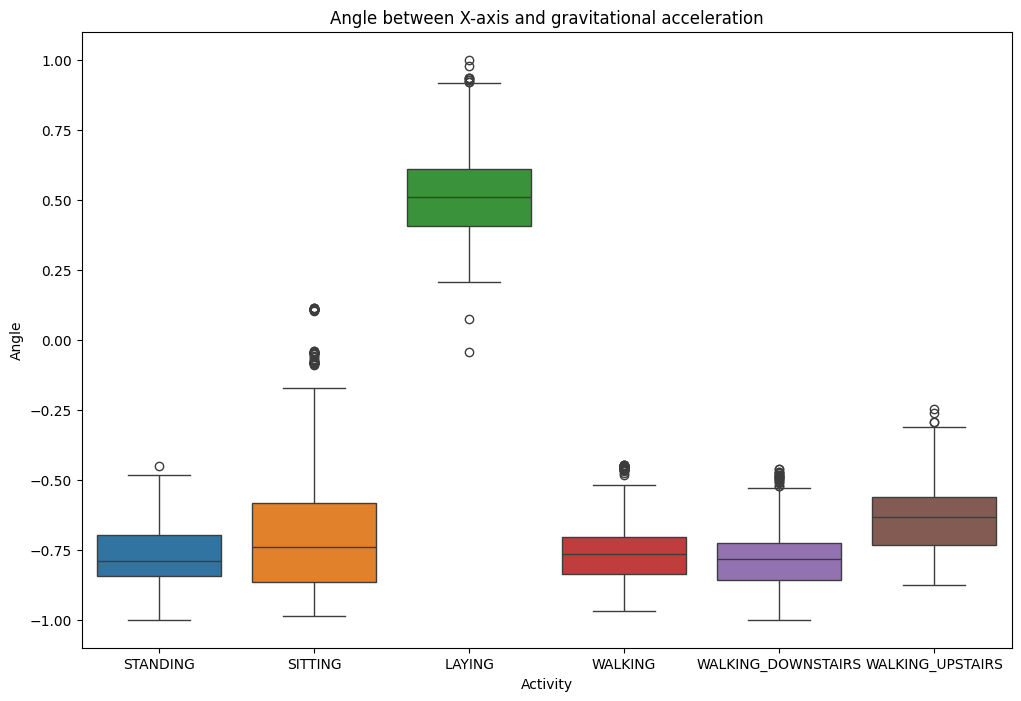

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train, x='Activity', y='angle(X,gravityMean)', palette=sns.color_palette())

# Легенда и название
plt.title('Angle between X-axis and gravitational acceleration')
plt.xlabel('Activity')
plt.ylabel('Angle')

plt.show()

### Вывод
- больше всего бросается в глаза участок с активностью LAYING, **лежание**. Он имеет максимальный угол (по понятным причинам, при нежании телефон часто находится параллельно полу);
- на диаграмме видны выбросы, которые находятся за пределами "усов" ящиков. Это может указывать на то, что во время соответствующих активностей иногда происходят резкие изменения положения устройства. Больше всего их при лежании, что может быть связано (ну, например), с падением телефона, либо с переворачиванием человека на бок;
- распределение углов для динамических активностей, кажется более симметричным и имеет меньший по длине интервал, что может показывать ритмичные повороты "туда-сюда", связанные с повторяющимся паттерном шага.

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

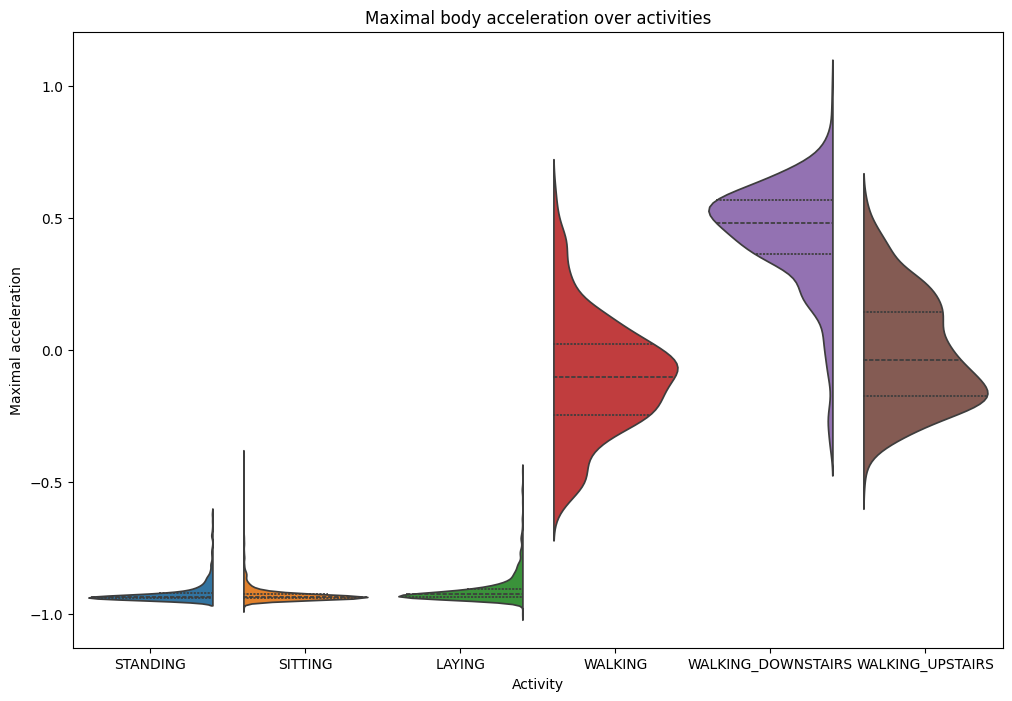

In [27]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X', palette=sns.color_palette(), inner='quart', split=True)

# Легенда и название
plt.title('Maximal body acceleration over activities')
plt.xlabel('Activity')
plt.ylabel('Maximal acceleration')

plt.show()

### Вывод
- я не смогла отметить чего-то сильно выделяющегося, но **спуск** по лестнице  имеет рапределение очень близкое к нормальному, и его квантили выше, чем у других динамических (и, разумеется, статических) активностей. Наверное, это связано с ритмичным спускаанием вниз + вниз люди идут с большим ускорением, не работаем против гравитации :)
- конечно, разница между динамикой и статикой все еще сильно видна:  статические активности имеют более узкие и симметричные распределения по сравнению с динамическими активностями, что снова указывает на меньшую вариативность ускорения во время статических активностей.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

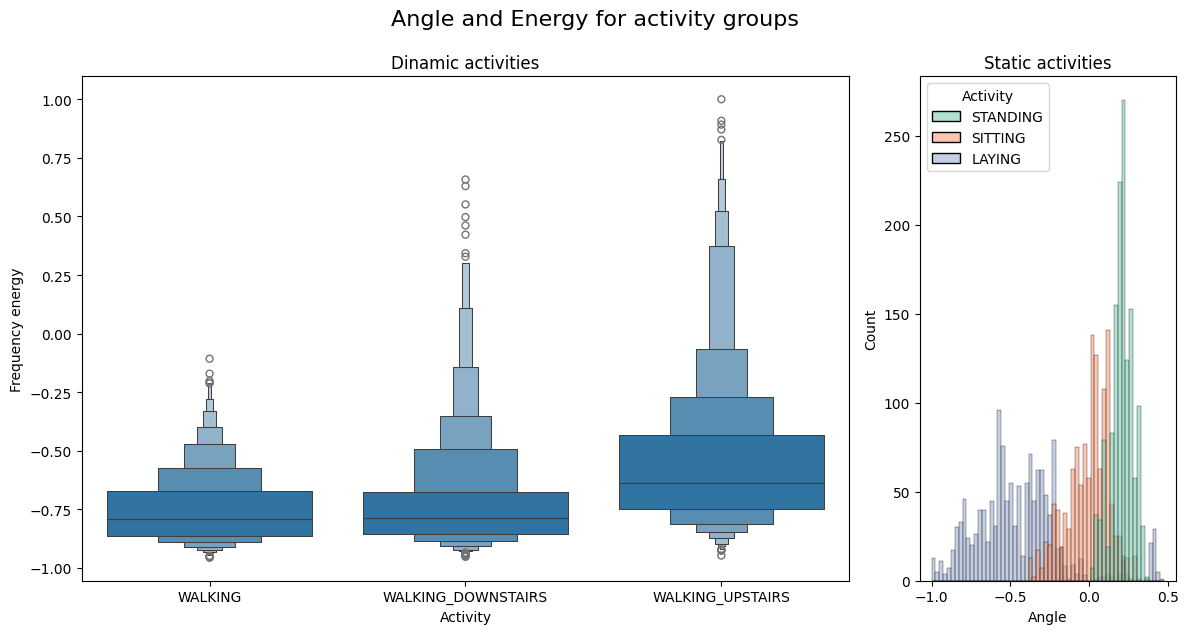

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Статические и динамические активности
static_activities = ['STANDING', 'SITTING', 'LAYING']
dynamic_activities = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Фильтруем
static_df = train[train['Activity'].isin(static_activities)]
dynamic_df = train[train['Activity'].isin(dynamic_activities)]

# Фигура (один график больше другого да...)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Динамические
sns.boxenplot(ax=axes[0], data=dynamic_df, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2')
axes[0].set_title('Dinamic activities')
axes[0].set_xlabel('Activity')
axes[0].set_ylabel('Frequency energy')

# Статические
sns.histplot(ax=axes[1], data=static_df, x='angle(Y,gravityMean)', kde=False, palette='Set2', bins=60, hue='Activity')
axes[1].set_title('Static activities')
axes[1].set_xlabel('Angle')
axes[1].set_ylabel('Count')

# Макет и название
plt.tight_layout()
plt.suptitle('Angle and Energy for activity groups', fontsize=16, y=1.05)

# Отображение графика
plt.show()

### Вывод
- на левом графике диапазоны значений и медианы отличаются друг от друга. Простая **ходьба** выделяется куда более узким диапазоном значений и минимальными выбросами, что указывает на меньшую вариативность и возможно куда менее интенсивное движение, влияющее на частоту ускорения;
- на правом графике **стояние** особенно выделяется более высокими значениями, что может показывать более горизонтальное положении телефона во время этой активности.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [29]:
def show_acceleration_and_angle_over_static_activities(df):
  # Только статические
  static_df = df[df['Activity'].isin(static_activities)]

  # Фигура
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Boxplot
  sns.boxplot(ax=axes[0], data=static_df, x='Activity', y='fBodyAcc-skewness()-X', palette='Set1')
  axes[0].set_title('Skewness of body acceleration over activities')
  axes[0].set_xlabel('Activity')
  axes[0].set_ylabel('Skewness')

  # Фильтруем для второго графика по условию< -0.376
  filtered_df = static_df[static_df['fBodyAcc-skewness()-X'] < -0.376]

  # Boxplot
  sns.boxplot(ax=axes[1], data=filtered_df, x='Activity', y='angle(Y,gravityMean)', palette='Set2')
  axes[1].set_title('Angle between Y-axis and gravity acceleration over activities')
  axes[1].set_xlabel('Activity')
  axes[1].set_ylabel('Angle')

  # Общее название
  plt.suptitle('Acceleration and Angle over static activities', fontsize=16)

  plt.tight_layout()
  plt.show()

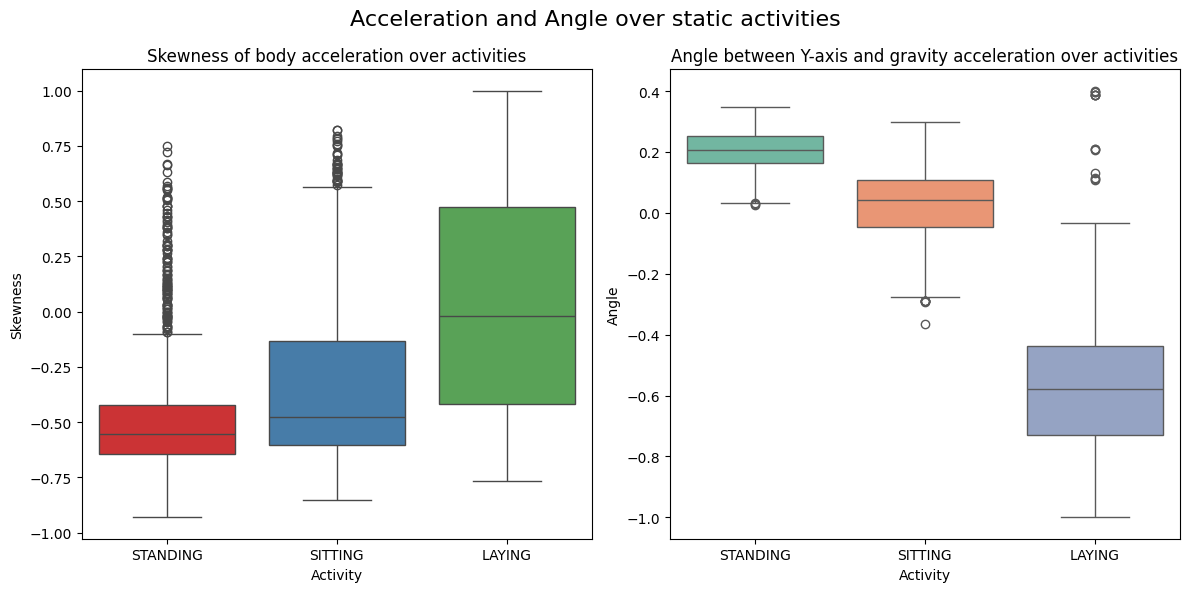

In [30]:
show_acceleration_and_angle_over_static_activities(train)

### Вывод
- распределение асимметричности частоты ускорения тела по оси Х для лежания значительно отличается от стояния и сидения, то есть этот признак хорошо отделяет лежание от других статических активностей. Медианные значения угла для сидения и стояния близки к нулю, но интервал распределения для лежания шире и имеет медиану, смещенную в сторону положительных значений.
- я бы выделила **сидение** по тому, как медиана угла близка к нулю

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

In [32]:
def show_body_and_gravity_acceleration_over_dinamic_activities(df):
  dynamic_df = df[df['Activity'].isin(dynamic_activities)]
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))

  # Скрипичная диаграмма для tBodyAcc-max()-X
  sns.violinplot(ax=axes[0], data=dynamic_df, x='Activity', y='tBodyAcc-max()-X')
  plt.title('Distribution of tBodyAcc-max()-X for Dynamic Activities')
  axes[0].set_title('Maximal body acceleration over activities')
  axes[0].set_xlabel('Activity')
  axes[0].set_ylabel('Acceleration')

  # Фильтруем по < 0.157
  filtered_df = dynamic_df[dynamic_df['tBodyAcc-max()-X'] < 0.157]
  sns.swarmplot(ax=axes[1], data=filtered_df, x='Activity', y='tGravityAcc-min()-X', palette='Set2')
  axes[1].set_title('Minimal gravity acceleration over activities')
  axes[1].set_xlabel('Activity')
  axes[1].set_ylabel(None)

  plt.suptitle('Body and gravity acceleration over dinamic activities')
  plt.show()

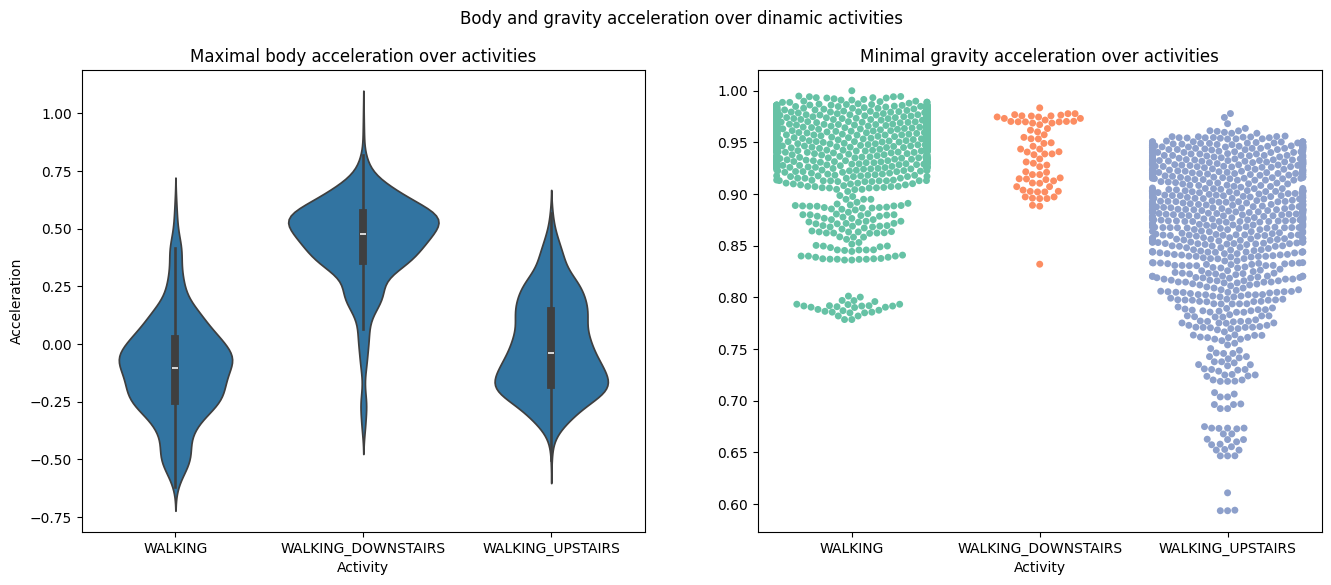

In [33]:
show_body_and_gravity_acceleration_over_dinamic_activities(train)

### Вывод
- на левой диаграмме подъем по лестнице выделяется: мы видим, что точки для этой активности имеют более низкие значения гравитационного ускорения, что может указывать на то, что (ну, например) человеку труднее полниматься по лестнице, потому его ускорение меньше.

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 12s, sys: 496 ms, total: 4min 13s
Wall time: 2min 23s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
fig = px.scatter(df_2_comp, x='x', y='y', color='Activity',
                 title='Visualization of Activities (2 Components)',
                 labels={'x': 'X', 'y': 'Y'})

fig.show()

### Вывод
- лежание отедляется лучше всего;
- стояние и силение пересекаются, но с погрешностью их можно разделить;
- тоже самое и с динамическими активностями.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
fig = px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity',
                 title='Visualization of Activities (3 Components)',
                 labels={'x': 'X', 'y': 'Y', 'z': 'Z'})

fig.show()

### Вывод
Да, все вполне отделяется! Примерно по такой же логике, как и в 2д.

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [35]:
def predict(df: pd.DataFrame):
    predictions = []
    for index, row in df.iterrows():
        if row['tBodyAcc-max()-X'] < -0.55:
            if row['angle(X,gravityMean)'] > 0.2:
                predictions.append('LAYING')
            elif 0.1 <= row['angle(Y,gravityMean)'] <= 0.4:
                predictions.append('STANDING')
            else:
                predictions.append('SITTING')
        elif row['tBodyAcc-max()-X'] >= 0.25:
            predictions.append('WALKING_DOWNSTAIRS')
        elif row['fBodyAcc-bandsEnergy()-1,8.2'] < -0.65:
            predictions.append('WALKING')
        else:
            predictions.append('WALKING_UPSTAIRS')
    return predictions

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [36]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.7958378672470077
Accuracy on test set => 0.7556837461825585


### Вывод
- осознание того, зачем мы вообще рисуем столько графиков, пришло под конец. Как-то сначала пропсутила именно задачу категоризации...
- ...зато потом как осознала и переделала много!!!
- была такая внезапная радость когда на последнем задании с первой попытки выбила 78-72!!! До сих пор приятно. Да и тыкаться до 79-75 долго не пришлось)
- но в целом после середины домашки я чувствую себя как этот кот... но правда после последнего задания счастливая!

![Tired Cat](https://i.pinimg.com/564x/8b/57/94/8b579439d9842f7dceb181094e284432.jpg)